## Pandas

Pandas je knihovna v jazyce Python, která poskytuje nástroje pro práci s daty. Je velmi populární v oblasti datové analýzy díky své jednoduchosti a efektivitě. Pandas umožňuje snadnou manipulaci s datovými strukturami a operacemi na těchto strukturách.

In [ ]:
pip install pandas

Nejprve musíme Pandas importovat do našeho Python skriptu nebo Jupyter Notebooku:

In [ ]:
import pandas as pd

#### Základní datové struktury v Pandas

Pandas pracuje se dvěma hlavními datovými strukturami:

**Series**: Jednorozměrné pole podobné seznamu.

**DataFrame**: Dvourozměrná tabulka podobná tabulce v Excelu.

#### Vytvoření Series

Series je jednorozměrné pole s popisky (indexy).

In [ ]:
import pandas as pd

data = [1, 2, 3, 4, 5]
s = pd.Series(data)
print(s)

#### Vytvoření DataFrame

DataFrame je dvourozměrná tabulka dat s řadami a sloupci.

In [ ]:
import pandas as pd

data = {
    'Jméno': ['Anna', 'Boris', 'Cyril'],
    'Věk': [23, 35, 45],
    'Město': ['Praha', 'Brno', 'Ostrava']
}

df = pd.DataFrame(data)
df

#### Načtení dat z CSV souboru

Pandas umožňuje snadno načíst data z CSV souboru.

In [2]:
import pandas as pd

df = pd.read_csv('product_prices.csv', delimiter=';')    #pd.read_csv('data.csv')
# Zobrazí prvních 5 řádků
df.shape

pocet_radku = df.shape[0]
pocet_sloupcu = df.shape[1]

print(f'Počet řádků v mém datasetu je: {pocet_radku}, pocet sloupců je: {pocet_sloupcu}')

Počet řádků v mém datasetu je: 149940, pocet sloupců je: 7


#### Základní operace s DataFrame

Zobrazení prvních/posledních řádků:

In [5]:
df.tail()  # Prvních 5 řádků
#print(df.tail())  # Posledních 5 řádků

,Name,Goods types,Measurement unit,Group ID,Product types,Value,Date
149935,KUYAVIA-POMERANIA,NaN,PLN,2,pork meat (raw bacon) - per 1kg,12.15,2016-11
149936,ŁÓDŹ,"beet sugar white, bagged - per 1kg",PLN,3,NaN,0.00,2012-5
149937,LESSER POLAND,NaN,PLN,4,plain mixed bread (wheat-rye) - per 1kg,3.05,2008-6
149938,WARMIA-MASURIA,NaN,PLN,2,boneless beef (sirloin) - per 1kg,11.87,2000-11
149939,MASOVIA,NaN,PLN,4,Masurian barley groats - per 1kg,0.16,2005-10


#### Získání informací o DataFrame:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149940 entries, 0 to 149939
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Name              149940 non-null  object 
 1   Goods types       34272 non-null   object 
 2   Measurement unit  149940 non-null  object 
 3   Group ID          149940 non-null  int64  
 4   Product types     115668 non-null  object 
 5   Value             137088 non-null  float64
 6   Date              149940 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 8.0+ MB


In [7]:
df.describe() # Statistické shrnutí

,Group ID,Value
count,149940.000000,137088.000000
mean,2.571429,6.615227
std,1.022206,34.112858
min,1.000000,0.000000
25%,2.000000,0.000000
50%,2.000000,3.090000
75%,4.000000,10.920000
max,4.000000,3000.000000


In [12]:
df['Value'].mean()

6.615226740294512

#### Výběr sloupců:

In [17]:
# 1 sloupec
df['Name']

# 2 sloupce
df[['Name', 'Goods types']]

,Name,Goods types
0,SUBCARPATHIA,NaN
1,ŁÓDŹ,NaN
2,KUYAVIA-POMERANIA,NaN
3,LOWER SILESIA,NaN
4,WARMIA-MASURIA,NaN
...,...,...
149935,KUYAVIA-POMERANIA,NaN
149936,ŁÓDŹ,"beet sugar white, bagged - per 1kg"
149937,LESSER POLAND,NaN
149938,WARMIA-MASURIA,NaN


#### Filtrace řádků:

`.loc` v pandas je atribut DataFrame nebo Series, který slouží k indexování a výběru dat na základě štítků. Tato metoda umožňuje přístup k řádkům a sloupcům podle jejich jmen (label) nebo logických podmínek, a to jak pro čtení, tak pro zápis.

Přístup pro zobrazení řádků pomocí podmínky uvnitř atributu `.loc` 

In [ ]:
# 1. způsob 
df[df['Věk'] > 30]
#df[podmínka, která musí být splněna]

In [ ]:
# 2. způsob .- počet produktů, které stojí víc než 30 PLN
df.loc[ df['Value'] > 30 ].shape[0]

686

Výběr více řádků/sloupců

Pandas umožňuje v atributu `.loc` filtrovat jak řádky, tak i sloupce. Většinou se využívá přístup přes sloupce, ale ukážeme si i přístup přes N řádků.

`.loc[řádky, sloupce]` 

In [ ]:
# Zobraz mi první dva řádky ze sloupce Year
df.loc[0:2, df['Goods types']]

In [ ]:
# Zobraz mi sloupce Year a Věk
df.loc[['Year', 'Věk']]

V Pandas se `.loc` běžně používá také k podmíněné aktualizaci hodnot ve vybraných buňkách DataFrame. Pomocí této syntaxe můžete změnit hodnoty v určitém sloupci na základě splnění dané podmínky.


`DataFrame.loc[podmínka, sloupec] = nová_hodnota`

**podmínka**: Logická maska nebo výraz, který určuje, které řádky chcete upravit.

**sloupec**: Název sloupce, ve kterém chcete změnit hodnoty.

**nová_hodnota**: Hodnota nebo výraz, který se má přiřadit buňkám odpovídajícím podmínce.


In [29]:
import pandas as pd

# Vytvoříme DataFrame
df = pd.DataFrame({ 
    'jméno': ['Anna', 'Petr', 'Eva', 'Jan'],
    'věk': [23, 34, 29, 40],
    'město': ['Praha', 'Brno', 'Ostrava', 'Praha']}
)

# Změníme 'město' na 'Plzeň' pro všechny, kteří mají věk větší než 30
df.loc[df['věk'] > 30, 'město'] = 'Plzeň'

print(df)

  jméno  věk    město
0  Anna   23    Praha
1  Petr   34    Plzeň
2   Eva   29  Ostrava
3   Jan   40    Plzeň


**Změna na základě více podmínek**

Pro složitější podmínky lze použít operátory jako & (a), | (nebo), nebo ~ (negace).

In [30]:
# Změníme 'město' na 'Brno' pro ty, kteří jsou mladší než 30 a mají jméno 'Anna'
df.loc[(df['věk'] < 30) & (df['jméno'] == 'Anna'), 'město'] = 'Brno'

**Použití výrazů jako nové hodnoty**

Hodnotu můžete nastavit na základě výpočtu nebo jiného sloupce.

In [31]:
# Změníme 'věk' na jeho dvojnásobek pro ty, kteří mají 'město' jako 'Plzeň'
df.loc[df['město'] == 'Plzeň', 'věk'] = df['věk'] * 2

**Tipy a upozornění**

**Logická maska musí odpovídat indexu**: Podmínka musí vracet hodnoty `True/False` pro všechny řádky v DataFrame.

**Změny se aplikují přímo (in-place)**: Změny provedené pomocí .loc upravují DataFrame bez nutnosti přiřazení zpět.

**Chybějící hodnoty (NaN)**: Pokud použijete podmínku na sloupec obsahující NaN, porovnávání může vést k nečekaným výsledkům, protože NaN není rovno žádné hodnotě (ani sobě samému). Použijte například pd.isnull() nebo pd.notnull() pro kontrolu.

#### Přidání nového sloupce:

In [33]:
df['Dvojnásobný_věk'] = df['věk'] * 2
df

,jméno,věk,město,Dvojnásobný_věk
0,Anna,23,Brno,46
1,Petr,68,Plzeň,136
2,Eva,29,Ostrava,58
3,Jan,80,Plzeň,160


#### Odstranění sloupce:

In [ ]:
df = df.drop(['Dvojnásobný_věk', 'Město'], axis=1)
#df = df.drop('Nový_sloupec', axis=1)

In [ ]:
df

#### Uložení DataFrame do CSV:

In [34]:
df.to_excel('export_test.xlsx', index=False)
#df.to_csv('novy_data.csv', index=False)

#### Praktický příklad

In [ ]:
import pandas as pd

# Načtení dat
df = pd.read_csv('export_test.csv')

# Zobrazení prvních 5 řádků
print(df.head())

# Získání informací o DataFrame
print(df.info())

# Výběr sloupce 'Jméno'
print(df['Jméno'])

# Filtrace řádků, kde je věk větší než 30
print(df[df['Věk'] > 30])

# Přidání nového sloupce 'Dvojnásobný věk'
df['Dvojnásobný věk'] = df['Věk'] * 2
print(df)

# Uložení upraveného DataFrame do nového CSV souboru
df.to_csv('upraveny_data.csv', index=False)

#### Práce s chybějícími hodnotami

Chybějící hodnoty mohou být v datech běžným problémem. Pandas nabízí několik metod, jak s nimi pracovat.

1. Kontrola chybějících hodnot:

In [39]:
import pandas as pd

df = pd.DataFrame({
    'Jméno': ['Anna', 'Boris', 'Cyril'],
    'Věk': [23, None, 45],
    'Město': ['Praha', 'Brno', None]
})

df.isnull()

#print(df.isnull())  # Zjistí, které hodnoty jsou chybějící
#print(df.isnull().sum())  # Spočítá chybějící hodnoty v každém sloupci

,Jméno,Věk,Město
0,False,False,False
1,False,True,False
2,False,False,True


2. Odstranění chybějících hodnot:

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'Jméno': ['Anna', 'Boris', 'Cyril'],
    'Věk': [23, None, 45],
    'Město': ['Praha', 'Brno', None]
})

df.dropna(how='any', inplace=True)
#df_cleaned = df.dropna()  # Odstraní všechny řádky s chybějícími hodnotami
#print(df_cleaned)


,Jméno,Věk,Město
0,Anna,23.0,Praha


In [ ]:
df

Náhrada chybějících hodnot:

In [41]:
import pandas as pd

df = pd.DataFrame({
    'Jméno': ['Anna', 'Boris', 'Cyril'],
    'Věk': [23, None, 45],
    'Město': ['Praha', 'Brno', None]
})

df_filled = df.fillna({
    'Věk': df['Věk'].mean(), # Nahradí chybějící hodnoty ve sloupci Věk průměrem
    'Město': 'Neznám město'  # Nahradí chybějící hodnoty ve sloupci Město řetězcem 'Neznámé'
})

df_filled

,Jméno,Věk,Město
0,Anna,23.0,Praha
1,Boris,34.0,Brno
2,Cyril,45.0,Neznám město


#### Skupinové operace

Pandas umožňuje snadné skupinování dat a aplikaci agregačních funkcí.

1. Skupinování a agregace:

In [ ]:
import pandas as pd

data = {
    'Jméno': ['Anna', 'Boris', 'Cyril', 'Anna', 'Boris', 'Cyril', 'Alžběta'],
    'Město': ['Praha', 'Brno', 'Ostrava', 'Praha', 'Brno', 'Ostrava', 'Brno'],
    'Věk': [23, 35, 45, 24, 36, 46, 10]
}

df = pd.DataFrame(data)
df.head()

,Jméno,Město,Věk
0,Anna,Praha,23
1,Boris,Brno,35
2,Cyril,Ostrava,45
3,Anna,Praha,24
4,Boris,Brno,36


In [ ]:
# Chceme získat průměrný věk občanů v každém městě
df.groupby('Město')['Věk'].mean()

# Chceme získat počet občanů v každém městě
df.groupby('Město')['Věk'].count()

# Chceme získat věk nejmladšího občana v každém městě
df.groupby('Město')['Věk'].min()

# Chceme získat věk nejstaršího občana v každém městě
df.groupby('Město')['Věk'].max()

# Vše dohromady - více agregačních funkcí na jednom výstupu
df.groupby('Město')['Věk'].agg(['mean', 'count', 'min', 'max'])


Město
Brno       36
Ostrava    46
Praha      24
Name: Věk, dtype: int64

In [62]:
df['Město'].unique()

array(['Praha', 'Brno', 'Ostrava'], dtype=object)

In [ ]:
seskupena = df.groupby('Město')
for mesto, vek in seskupena:
    print(f'Město: {mesto}')
    print(vek)

Město: Brno
     Jméno Město  Věk
1    Boris  Brno   35
4    Boris  Brno   36
6  Alžběta  Brno   10
Město: Ostrava
   Jméno    Město  Věk
2  Cyril  Ostrava   45
5  Cyril  Ostrava   46
Město: Praha
  Jméno  Město  Věk
0  Anna  Praha   23
3  Anna  Praha   24


2. Použití více agregačních funkcí:

In [ ]:
import pandas as pd

data = {
    'Jméno': ['Anna', 'Boris', 'Cyril', 'Anna', 'Boris', 'Cyril'],
    'Město': ['Praha', 'Brno', 'Ostrava', 'Praha', 'Brno', 'Ostrava'],
    'Věk': [23, 35, 45, 24, 36, 46]
}

df = pd.DataFrame(data)

grouped = df.groupby('Město')
print(grouped['Věk'].agg(['mean', 'sum', 'count']))  # Použije více agregačních funkcí najednou

In [ ]:
import pandas as pd

df = pd.read_csv('product_prices.csv', delimiter=';')

# Vypočti průměrnou cenu pro každou oblast (Oblast = sloupec Name)
df.groupby('Name')['Value'].mean().reset_index(name='Average value')

# Zjisti mi maximální cenu pro každý produkt (Product types)
df_produkty_ceny = df.groupby('Product types')['Value'].max().reset_index(name='Max price')

# Řazení
df_produkty_ceny.sort_values(by='Max price', ascending=False)

# Kratší zformátovaný zápis - pomocí zpětných lomítek - každá metoda na novém řádku, čitelnější
df.groupby('Product types') \
    ['Value'].max() \
    .reset_index(name='Max price') \
    .sort_values(by='Max price', ascending=False)

# Kratší zformátovaný zápis - pomocí závorky na začátku a na konci - každá metoda na novém řádku, čitelnější
(df.groupby('Product types') 
    ['Value'].max() 
    .reset_index(name='Max price') 
    .sort_values(by='Max price', ascending=False))

,Product types,Max price
7,boneless beef (sirloin) - per 1kg,36.68
6,beef with bone (rump steak) - per 1kg,33.05
1,Hunter's sausage dried - per 1kg,29.82
18,pork ham cooked - per 1kg,26.91
17,pork belly cooked - per 1kg,23.64
13,haddock fillets frozen - per 1kg,23.03
21,smoked bacon with ribs - per 1kg,20.94
12,fresh non-dressed trout - per 1kg,17.81
15,pork meat (raw bacon) - per 1kg,16.80
16,pork with bone (center-cut pork chop) - per 1kg,16.40


In [50]:
import pandas as pd

df = pd.read_csv('product_prices_renamed.csv', delimiter=';')

Příklad: What was the average monthly price (date) of each product_line?

In [ ]:
df.head()

df.groupby(['product_line', 'date'])['value'].mean()

Which product had the highest price volatility over the years?

Který produkt měl nejvyšší volatilitu ceny v čase?

In [ ]:
df.head()

df_volatilita = df.groupby('product_line')['value'].std().reset_index(name='Směrodatná odchylka')
# Získat největší hodnotu ze sloupce směrodatná odchylka pomocí řazení
df_volatilita.sort_values(by='Směrodatná odchylka', ascending=False).head(1)

# Optimálnější
df_volatilita.nlargest(columns='Směrodatná odchylka', n=1)

,product_line,Směrodatná odchylka
7,boneless beef (sirloin) - per 1kg,7.044737


In [34]:
df.head(1)

,province,product_types,currency,product_group_id,product_line,value,date
0,SUBCARPATHIA,NaN,PLN,2,pork ham cooked - per 1kg,21.37,2013-3


In [ ]:
df.info()

df.loc[ df['date'] > 1999 ]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149940 entries, 0 to 149939
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   province          149940 non-null  object 
 1   product_types     34272 non-null   object 
 2   currency          149940 non-null  object 
 3   product_group_id  149940 non-null  int64  
 4   product_line      115668 non-null  object 
 5   value             137088 non-null  float64
 6   date              149940 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 8.0+ MB


,province,product_types,currency,product_group_id,product_line,value,date
0,SUBCARPATHIA,NaN,PLN,2,pork ham cooked - per 1kg,21.37,2013-3
1,ŁÓDŹ,NaN,PLN,4,bread - per 1kg,NaN,2018-2
2,KUYAVIA-POMERANIA,NaN,PLN,2,barley groats sausage - per 1kg,3.55,2019-12
3,LOWER SILESIA,NaN,PLN,2,dressed chickens - per 1kg,6.14,2019-2
4,WARMIA-MASURIA,NaN,PLN,2,Italian head cheese - per 1kg,5.63,2002-3
...,...,...,...,...,...,...,...
149935,KUYAVIA-POMERANIA,NaN,PLN,2,pork meat (raw bacon) - per 1kg,12.15,2016-11
149936,ŁÓDŹ,"beet sugar white, bagged - per 1kg",PLN,3,NaN,0.00,2012-5
149937,LESSER POLAND,NaN,PLN,4,plain mixed bread (wheat-rye) - per 1kg,3.05,2008-6
149938,WARMIA-MASURIA,NaN,PLN,2,boneless beef (sirloin) - per 1kg,11.87,2000-11


#### Práce s daty a časem

Pandas má silnou podporu pro práci s daty a časem.

Konverze na datetime:
Sloupce s datumem se většinou do Pandas natáhnou jako string. Pokud s nimi chceme pracovat, jako s datumy, musíme je náležitě přetypovat na datový typ `datetime`. To provádíme pomocí metody `.to_datetime(sloupec)`.

In [ ]:
import pandas as pd

data = {
    'Datum': ['2023-01-01', '2023-02-01', '2024-03-01', '2024-06-01', '2024-07-01']
}

df = pd.DataFrame(data)
df.head()

#data['Rok'] = data['Datum'].dt.year

df['Datum'] = pd.to_datetime(df['Datum'])

# Extrakce roku do nového sloupce
df['Rok'] = df['Datum'].dt.year
df.head()

# Extrakce měsíce do nového sloupce
df['Měsíc'] = df['Datum'].dt.month

df.head()

,Datum,Rok,Měsíc
0,2023-01-01,2023,1
1,2023-02-01,2023,2
2,2024-03-01,2024,3
3,2024-06-01,2024,6
4,2024-07-01,2024,7


In [53]:
df.head(1)

,province,product_types,currency,product_group_id,product_line,value,date
0,SUBCARPATHIA,NaN,PLN,2,pork ham cooked - per 1kg,21.37,2013-3


product_prices_renamed.csv

In [ ]:
#df['date'] = pd.to_datetime(df['date'], format='mixed')

# Najít řádky s datumem 2099-13 a 1888-0 a uložit si jejich index
radky_ke_smazani = df.loc[ (df['date'] == '2099-13') | (df['date'] == '1888-0') ].index

# Smazat tyhle řádky - do parametru index předávám čísla(indexy) řádků, které chceme mazat
df.drop(index=radky_ke_smazani, inplace=True)

In [72]:
df.loc[ df['date'] == '1888-0' ]

,province,product_types,currency,product_group_id,product_line,value,date


In [ ]:
# Přetypování na datetime pomocí mixed formatu, jelikož nemáme standardní formát datumu
df['date'] = pd.to_datetime(df['date'], format='mixed')

In [83]:
# Vytvoření nového sloupce s rokem
df['year'] = df['date'].dt.year
df.head()

# Vytvoření nového sloupce s měsícem
df['month'] = df['date'].dt.month
df.head(20)

,province,product_types,currency,product_group_id,product_line,value,date,year,month
0,SUBCARPATHIA,NaN,PLN,2,pork ham cooked - per 1kg,21.37,2013-03-01,2013,3
1,ŁÓDŹ,NaN,PLN,4,bread - per 1kg,NaN,2018-02-01,2018,2
2,KUYAVIA-POMERANIA,NaN,PLN,2,barley groats sausage - per 1kg,3.55,2019-12-01,2019,12
3,LOWER SILESIA,NaN,PLN,2,dressed chickens - per 1kg,6.14,2019-02-01,2019,2
4,WARMIA-MASURIA,NaN,PLN,2,Italian head cheese - per 1kg,5.63,2002-03-01,2002,3
5,HOLY CROSS,whole pickled cucumbers 0.9l - per 1pc.,PLN,1,NaN,0.28,2010-04-01,2010,4
6,WEST POMERANIA,fresh chichen egges - per 666pcs.,PLN,3,NaN,0.00,2004-12-01,2004,12
7,POLAND,NaN,PLN,2,pork belly cooked - per 1kg,19.62,2017-03-01,2017,3
8,KUYAVIA-POMERANIA,NaN,PLN,2,pork with bone (center-cut pork chop) - per 1kg,11.19,1999-04-01,1999,4
9,PODLASKIE,NaN,PLN,4,plain mixed bread (wheat-rye) - per 1kg,3.86,2017-07-01,2017,7


### 1. příklad: Zjisti, kolik produktů s cenou je v každém roce evidováno 

In [ ]:
df.groupby('year')['value'].count().reset_index()
#df.groupby('year')['product_line'].count().reset_index()['product_line'].sum()

### 2. příklad: Zjistěte maximální cenu produktů (pouze ty s cenou) v každém roce

In [ ]:
# Zápis s detailem - maximální průměrné ceny pro každý produkt pro každý rok
df.groupby(['year', 'product_line'])['value'].max()

In [ ]:
# Menší detail - maximální průměrná cena ze všech produktů za každý rok
df.groupby('year')['value'].max()

### 3. příklad: Zjistěte průměrnou cenu produktů v provincii `LOWER SILESIA` v roce `2018`

In [ ]:
# Zápis s uložením do proměnné
df_silesia = df.loc[ (df['province'] == 'LOWER SILESIA') & (df['year'] == 2018)]
df_silesia['value'].mean()

7.194048694779117

In [106]:
# Kratší zápis
df.loc[ (df['province'] == 'LOWER SILESIA') & (df['year'] == 2018)]['value'].mean()

7.194048694779117

## SPOTIFY DATASET

In [144]:
df = pd.read_csv('Most Streamed Spotify Songs 2024.csv', encoding='unicode_escape', thousands=',')

# Zjistit strukturu dat
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   int64  
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   float64
 8   Spotify Playlist Count      4530 non-null   float64
 9   Spotify Playlist Reach      4528 non-null   float64
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   float64
 12  YouTube Likes               4285 non-null   float64
 13  TikTok Posts                3427 

In [113]:
df.describe()

,Track Score,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,TIDAL Popularity,Explicit Track
count,4600.000000,3796.000000,4039.00000,3679.000000,3545.000000,0.0,4600.000000
mean,41.844043,63.501581,54.60312,32.310954,25.348942,NaN,0.358913
std,38.543766,16.186438,71.61227,54.274538,25.989826,NaN,0.479734
min,19.400000,1.000000,1.00000,1.000000,1.000000,NaN,0.000000
25%,23.300000,61.000000,10.00000,5.000000,8.000000,NaN,0.000000
50%,29.900000,67.000000,28.00000,15.000000,17.000000,NaN,0.000000
75%,44.425000,73.000000,70.00000,37.000000,34.000000,NaN,1.000000
max,725.400000,96.000000,859.00000,632.000000,210.000000,NaN,1.000000


In [118]:
# Zobrazíme názvy všech sloupců
df.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track'],
      dtype='object')

In [165]:
# Smazání nepotřebných sloupců
sloupce_smazat = ['Deezer Playlist Count', 'Deezer Playlist Reach', 
                  'SiriusXM Spins', 'Soundcloud Streams', 'Amazon Playlist Count', 
                  'Pandora Streams', 'Pandora Track Stations', 'Apple Music Playlist Count', 'AirPlay Spins', 'Explicit Track', 'TIDAL Popularity']

df.drop(axis=1, labels=sloupce_smazat, inplace=True)

In [166]:
df.head(2)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Shazam Counts,Month
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,390470936.0,30716.0,196631588.0,92.0,84274754.0,1713126.0,5767700.0,651565900.0,5.332282e+09,150597040.0,2669262.0,4
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,323703884.0,28113.0,174597137.0,92.0,116347040.0,3486739.0,674700.0,35223547.0,2.083390e+08,156380351.0,1118279.0,5


In [ ]:
# Ošetřit datové typy - views jsou jako string -> při použití thousands v metodě .read_csv není třeba! 
# Pouze, pokud potřebuji sloupec upravit a přetypovat

df['Spotify Streams'] = pd.to_numeric(df['Spotify Streams'].str.replace(',', ''), errors='coerce')
df['Spotify Playlist Count'] = pd.to_numeric(df['Spotify Playlist Count'].str.replace(',', ''), errors='coerce').astype('Int64')
df.head()

In [146]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,3.904709e+08,30716.0,196631588.0,...,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,4818457.0,2669262.0,NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,3.237039e+08,28113.0,174597137.0,...,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,6623075.0,1118279.0,NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,6.013093e+08,54331.0,211607669.0,...,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,7208651.0,5285340.0,NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,2.031281e+09,269802.0,136569078.0,...,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,NaN,11822942.0,NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,1.070349e+08,7223.0,151469874.0,...,1.0,82.0,17660624.0,105.0,4493884.0,7006.0,207179.0,457017.0,NaN,1


## Získat TOP 5 nejhranějších songů na Spotify (nejvíce přehrání) za rok 2024

In [155]:
df[['Track', 'Spotify Streams']]

# Řešení se řazením
df[['Track', 'Artist', 'Spotify Streams']].sort_values(by='Spotify Streams', ascending=False).head(5)

# Řešení s metodou .nlargest()
df[['Track', 'Artist', 'Spotify Streams']].nlargest(columns='Spotify Streams', n=5)

,Track,Artist,Spotify Streams
55,Blinding Lights,The Weeknd,4.281469e+09
4254,Blinding Lights,xSyborg,4.261328e+09
53,Shape of You,Ed Sheeran,3.909459e+09
1637,Shape of You,xSyborg,3.888356e+09
132,Someone You Loved,Lewis Capaldi,3.427499e+09


In [ ]:
# Přetypování datumu na datový typ datetime
df['Release Date'] = pd.to_datetime(df['Release Date'])

In [ ]:
# Vytvoření nového sloupce Month
df['Month'] = df['Release Date'].dt.month

### Jaký song vydaný v červenci byl nejposlouchanějším songem?
1. hint: Vyfiltrovat si pouze songy v červenci

In [172]:
# Jednořádkový zápis
df[['Track', 'Spotify Streams']].loc[ df['Month'] == 7 ].nlargest(columns='Spotify Streams', n=1)

# Delší zápis
cervencove_songy = df[['Track', 'Spotify Streams']].loc[ df['Month'] == 7 ]
cervencove_songy.nlargest(columns='Spotify Streams', n=1)

# Řešení přes řazení
df[['Track', 'Spotify Streams']].loc[ df['Month'] == 7 ].sort_values(by='Spotify Streams', ascending=False).head(1)

,Track,Spotify Streams
26,STAY (with Justin Bieber),3.107100e+09


### Zjistit TOP 5 zpěváků (artistů), kteří v roce 2024 vydali nejvíce songů
1. Vytvořit sloupec s rokem vydání
2. Získat pouze songy vydané v r. 2024
3. Získat počet vydaných songů pro každého zpěváka
4. Získat 5 zpěváků s nejvyšším počtem vydaných songů v r. 2024

In [192]:
# Sloupec s rokem vydání
df['year'] = df['Release Date'].dt.year

# Vyfiltrovat pouze songy vydané v r. 2024
songy_2024 = df.loc[ df['year'] == 2024 ]
# Získat počet vydaných songů pro každého zpěváka
vydane_songy = songy_2024.groupby('Artist')['Track'].count().reset_index(name='Songs in 2024')
# Získat 5 zpěváků s nejvyšším počtem vydaných songů v r. 2024
print('Top 5 zpěváků s nejvíce vydanými songy za r. 2024:')
vydane_songy.nlargest(columns='Songs in 2024',n=5)


Top 5 zpěváků s nejvíce vydanými songy za r. 2024:


,Artist,Songs in 2024
387,Taylor Swift,24
146,Future,15
241,Linkin Park,11
4,21 Savage,10
61,Billie Eilish,10


### Příklad: Ve kterém měsíci bylo vydáno nejvíce songů?
1. Seskupit data podle měsíce
2. Aplikovat agregační funkci na příslušný sloupec
3. Zobrazit měsíc s nejvyšším počtem

In [ ]:
df_seskupena = (df.groupby('Month')
    ['Track'].count()
    .reset_index(name='Počet songů')
    .sort_values(by='Počet songů', ascending=False)
)

### Příklad: Ve kterém dni v měsíci bylo vydáno nejvíce songů?
1. Seskupit data podle dne
2. Aplikovat agregační funkci na příslušný sloupec
3. Zobrazit den s nejvyšším počtem

In [230]:
# Vytvořit sloupec se dnem vydání
df['Release Day'] = df['Release Date'].dt.day

In [240]:
dny_seskupena = (df.groupby('Release Day')['Track']
    .count()
    .reset_index(name='Počet')
    .sort_values(by='Počet', ascending=False))
dny_seskupena

,Release Day,Počet
0,1,340
9,10,185
2,3,179
16,17,179
21,22,168
23,24,164
27,28,160
7,8,160
6,7,155
19,20,154


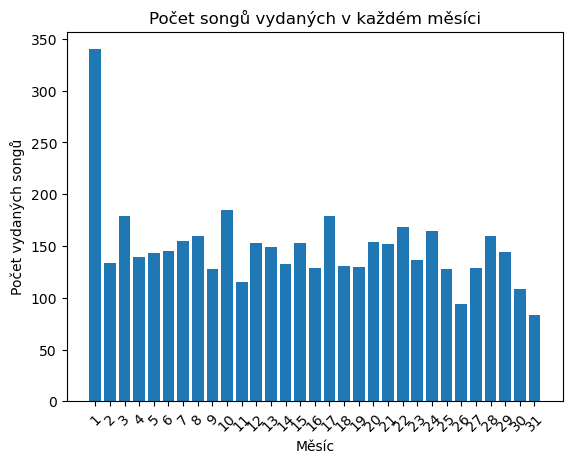

In [239]:
import matplotlib.pyplot as plt

plt.bar(dny_seskupena['Release Day'], dny_seskupena['Počet'])

plt.xticks(dny_seskupena['Release Day'], rotation=45)
plt.title('Počet songů vydaných v každém měsíci')
plt.xlabel('Měsíc')
plt.ylabel('Počet vydaných songů')
plt.show()

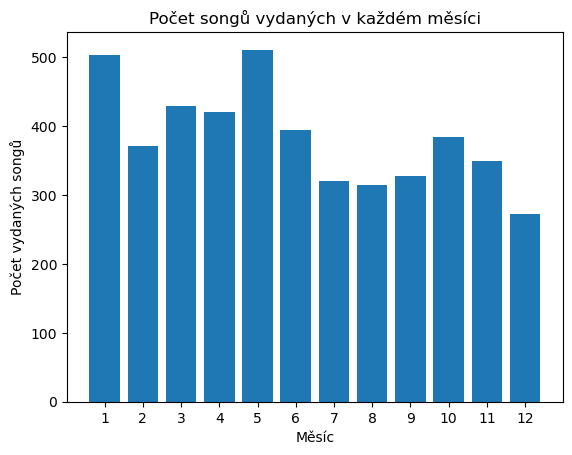

In [223]:
import matplotlib.pyplot as plt

plt.bar(df_seskupena['Month'], df_seskupena['Počet songů'])

plt.xticks(df_seskupena['Month'])
plt.title('Počet songů vydaných v každém měsíci')
plt.xlabel('Měsíc')
plt.ylabel('Počet vydaných songů')
plt.show()

In [193]:
df.head(3)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Shazam Counts,Month,year
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,390470936.0,30716.0,196631588.0,92.0,84274754.0,1713126.0,5767700.0,651565900.0,5.332282e+09,150597040.0,2669262.0,4,2024
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,323703884.0,28113.0,174597137.0,92.0,116347040.0,3486739.0,674700.0,35223547.0,2.083390e+08,156380351.0,1118279.0,5,2024
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,601309283.0,54331.0,211607669.0,92.0,122599116.0,2228730.0,3025400.0,275154237.0,3.369121e+09,373784955.0,5285340.0,3,2024


In [185]:
df.loc[ (df['Artist'] == 'Taylor Swift') & (df['year'] == 2024) ]

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Shazam Counts,Month,year
16,Fortnight (feat. Post Malone),THE TORTURED POETS DEPARTMENT,Taylor Swift,2024-04-18,USUG12401028,17,297.6,395433400.0,12784.0,177932568.0,89.0,104673836.0,2484083.0,139300.0,25348800.0,207317000.0,268893710.0,1210029.0,4,2024
266,I Can Do It With a Broken Heart,THE TORTURED POETS DEPARTMENT,Taylor Swift,2024-04-18,USUG12401040,267,95.0,250430303.0,7079.0,134357870.0,84.0,16747466.0,251549.0,148000.0,52156902.0,411722900.0,45283900.0,188022.0,4,2024
507,Down Bad,THE TORTURED POETS DEPARTMENT,Taylor Swift,2024-04-18,USUG12401031,504,68.7,210385853.0,5179.0,38317286.0,80.0,18713330.0,225439.0,46800.0,9697319.0,65541536.0,934654.0,84774.0,4,2024
866,Whoï¿½ï¿½ï¿½s Afraid of Little O,THE TORTURED POETS DEPARTMENT,Taylor Swift,2024-04-18,USUG12401037,862,52.3,166168092.0,5004.0,25607992.0,78.0,16423009.0,244859.0,NaN,815500.0,7202700.0,49401469.0,116673.0,4,2024
980,The Tortured Poets Department,THE TORTURED POETS DEPARTMENT,Taylor Swift,2024-04-18,USUG12401029,975,48.9,150693008.0,3273.0,15710281.0,NaN,15389385.0,261652.0,NaN,4822.0,39100.0,NaN,49802.0,4,2024
1013,"So Long, London",THE TORTURED POETS DEPARTMENT,Taylor Swift,2024-04-18,USUG12401032,1008,47.8,175613480.0,4454.0,20883678.0,84.0,15237337.0,222750.0,NaN,247100.0,1510800.0,24074850.0,67886.0,4,2024
1167,My Boy Only Breaks His Favorite Toys,THE TORTURED POETS DEPARTMENT,Taylor Swift,2024-04-18,USUG12401030,1161,44.0,161916445.0,3784.0,17036800.0,83.0,13509432.0,180327.0,NaN,NaN,NaN,NaN,47529.0,4,2024
1169,Florida!!! (feat. Florence + the Machine),THE TORTURED POETS DEPARTMENT,Taylor Swift,2024-04-18,USUG12401035,1162,44.0,140177107.0,3866.0,16996059.0,NaN,13707215.0,189148.0,18200.0,6292326.0,45866138.0,NaN,68490.0,4,2024
1270,Guilty as Sin?,THE TORTURED POETS DEPARTMENT,Taylor Swift,2024-04-18,USUG12401036,1264,42.1,165611453.0,4418.0,21928475.0,78.0,9873283.0,96083.0,NaN,774900.0,6383500.0,NaN,79964.0,4,2024
1294,But Daddy I Love Him,THE TORTURED POETS DEPARTMENT,Taylor Swift,2024-04-18,USUG12401033,1286,41.5,154819909.0,3535.0,21565868.0,76.0,10014516.0,120378.0,NaN,NaN,NaN,NaN,67086.0,4,2024


In [174]:
df.head(10)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Shazam Counts,Month
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,3.904709e+08,30716.0,196631588.0,92.0,8.427475e+07,1713126.0,5767700.0,6.515659e+08,5.332282e+09,1.505970e+08,2669262.0,4
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,3.237039e+08,28113.0,174597137.0,92.0,1.163470e+08,3486739.0,674700.0,3.522355e+07,2.083390e+08,1.563804e+08,1118279.0,5
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,6.013093e+08,54331.0,211607669.0,92.0,1.225991e+08,2228730.0,3025400.0,2.751542e+08,3.369121e+09,3.737850e+08,5285340.0,3
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2.031281e+09,269802.0,136569078.0,85.0,1.096101e+09,10629796.0,7189811.0,1.078758e+09,1.460373e+10,3.351189e+09,11822942.0,1
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,1.070349e+08,7223.0,151469874.0,88.0,7.737396e+07,3670188.0,16400.0,NaN,NaN,1.127639e+08,457017.0,5
5,Lovin On Me,Lovin On Me,Jack Harlow,2023-11-10,USAT22311371,6,410.1,6.706654e+08,105892.0,175421034.0,83.0,1.311481e+08,1392593.0,4202367.0,2.149435e+08,2.938687e+09,2.867223e+09,4517131.0,11
6,Beautiful Things,Beautiful Things,Benson Boone,2024-01-18,USWB12307016,7,407.2,9.001588e+08,73118.0,201585714.0,86.0,3.087231e+08,4120760.0,NaN,2.958494e+07,5.349153e+08,4.601580e+09,9990302.0,1
7,Gata Only,Gata Only,FloyyMenor,2024-02-02,QZL382406049,8,375.8,6.750792e+08,40094.0,211236940.0,92.0,2.283826e+08,1439495.0,3500000.0,3.385467e+08,3.804584e+09,2.112582e+09,6063523.0,2
8,Danza Kuduro - Cover,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -,MUSIC LAB JPN,2024-06-09,TCJPA2463708,9,355.7,1.653018e+09,1.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
9,BAND4BAND (feat. Lil Baby),BAND4BAND (feat. Lil Baby),Central Cee,2024-05-23,USSM12404354,10,330.6,9.067657e+07,10400.0,184199419.0,86.0,3.273524e+07,988682.0,325800.0,1.215745e+08,9.746562e+08,1.747069e+08,666302.0,5


Výběr dat na základě času:

In [ ]:
import pandas as pd

data = {
    'Datum': ['2023-01-01', '2023-02-01', '2023-03-01'],
    'Hodnota': [10, 20, 30]
}

df = pd.DataFrame(data)
df['Datum'] = pd.to_datetime(df['Datum'])

# Výběr řádků s datem po 1. únoru 2023 přes .loc
filtered_df = df.loc[df['Datum'] > '2023-02-01']
print(filtered_df)

# Výběr řádků s datem po 1. únoru 2023 přes .query
filtered_df_query = df.query("Datum > '2023-02-01'")
filtered_df_query

In [ ]:
df

In [ ]:
df.loc[df['Hodnota'].isin([10,20])]

### Optimalizace paměti pomocí typů dat:


In [ ]:
import pandas as pd

data = {
    'ID': [1, 2, 3, 4],
    'Hodnota': [100.1, 200.2, 300.3, 400.4],
    'Kategorie': ['A', 'B', 'A', 'B']
}

df = pd.DataFrame(data)
#df['ID'] = df['ID'].astype('int32')
df['Hodnota'] = df['Hodnota'].astype('float32')
df['Kategorie'] = df['Kategorie'].astype('category')
print(df.dtypes)

In [ ]:
df['Kategorie'] = df['Kategorie'].astype(str) # CAT -> STR
df['ID'] = df['ID'].astype('int64') # INT -> STR

df.info()

df['ID'] = df['ID'].astype('int32') # STR -> INT32
df['Kategorie'] = df['Kategorie'].astype('category') # CAT -> STR
df.info()

#### Vizualizace dat

Pandas nabízí základní nástroje pro vizualizaci dat pomocí knihovny Matplotlib.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Měsíc': ['Leden', 'Únor', 'Březen', 'Duben'],
    'Hodnota': [2, 4, 10, 15]
}

df = pd.DataFrame(data)

# Sloupcový graf
df.plot(kind='bar', x='Měsíc', y='Hodnota')
plt.show()

# Čarový graf
df.plot(kind='line', x='Měsíc', y='Hodnota')
plt.show()

Pokročilé grafy

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Měsíc': ['Leden', 'Únor', 'Březen', 'Duben'],
    'Hodnota': [100, 200, 300, 400]
}

df = pd.DataFrame(data)

# Histogram
df['Hodnota'].plot(kind='hist')
plt.show()

# Box plot
df.boxplot(column='Hodnota')
plt.show()

# Příklady

### Načíst do proměnné df soubor **product_prices_renamed.csv**

In [1]:
import pandas as pd

#### 1. Najít všechny řádky ve sloupci date s hodnotou 1888-0

 Najít všechny řádky ve sloupci date s datumem v budoucnu ( větší než 2024-07 )

### Najít všechny řádky, které mají ve sloupci value hodnotu 3000

### Zobrazit pouze unikátní hodnoty pro sloupec product_types

### Zobrazit všechny řádky, které mají ve sloupci product_types hodnotu **fresh chichen egges - per 666pcs.**

Přepsat všechny špatné názvy na **fresh chichen eggs - per 666pcs.**

**Př: Jaká je nejvyšší cena v historii v provincii POLAND?**

 1. krok: Získat data pouze pro provincii POLAND

 2. krok: Seřadit pomocí .sort_values od nejvyšší k nejnižšímu a získat produkt s nejvyšší cenou (první řádek po seřazení)



**Všechny záznamy s rokem 2099-12 změnit na 2019-1**

### Seskupit data podle sloupce product_line a vypočítat průměrnou cenu (sloupec value)

### Sloupec datum převést na datový typ datetime

### Vytvořte nový sloupec **rok**, jehož hodnota bude extrahovaný rok ze sloupce datum .

### Vytvořit pivotku pomocí pivot_table, na řádcích bude rok, ve sloupcích bude provincie, hodnoty bude průměrná cena

In [ ]:
pd.pivot_table(
    data=df,
    index='year',
    columns='province',
    values='value',
    aggfunc='mean'
)

### **Seskupte data podle roku a spočítejte průměrnou cenu** -> přejmenovat sloupec value na cena -> vyexportovat do .csv souboru

In [ ]:
class Clovek:
    def __init__(self, jmeno, prijmeni, vek, bydliste):
        self.jmeno = jmeno
        self.prijmeni = prijmeni
        self.vek = vek
        self.bydliste = bydliste

    def ziskejJmeno(self):
        return self.jmeno
    
    def zmenVek(self, vek):
        self.vek = vek